In [1]:
# load data
import pandas as pd
import numpy as np

data = pd.read_csv("kmean_data.csv")
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
# define X and y

X = data.drop(["labels"], axis=1)
y = data.loc[:, "labels"]

In [4]:
# 一共多少个种类
pd.value_counts(y)

/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_87506/232014922.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y)


labels
2    1156
1     954
0     890
Name: count, dtype: int64

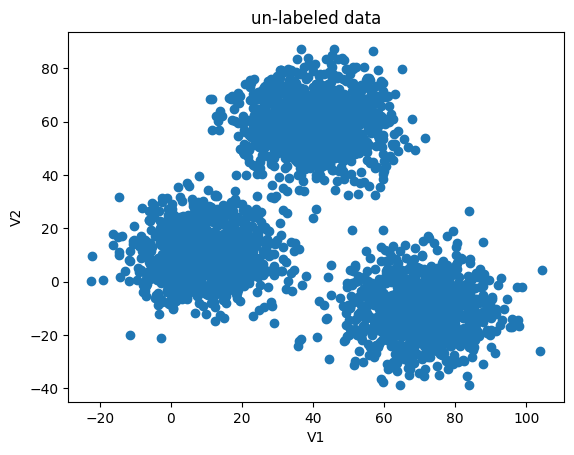

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure()
plt.scatter(X.loc[:, "V1"], X.loc[:, "V2"])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

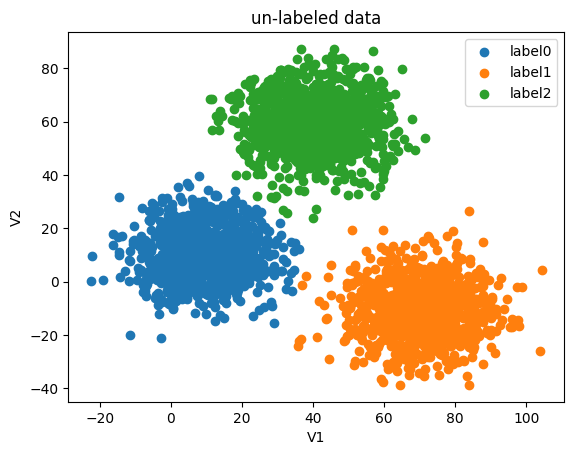

In [6]:
fig2 = plt.figure()
label0 = plt.scatter(X.loc[:, "V1"][y==0], X.loc[:, "V2"][y==0])
label1 = plt.scatter(X.loc[:, "V1"][y==1], X.loc[:, "V2"][y==1])
label2 = plt.scatter(X.loc[:, "V1"][y==2], X.loc[:, "V2"][y==2])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.show()

(3000, 2) (3000,)
[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


/Users/jiaronghe/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


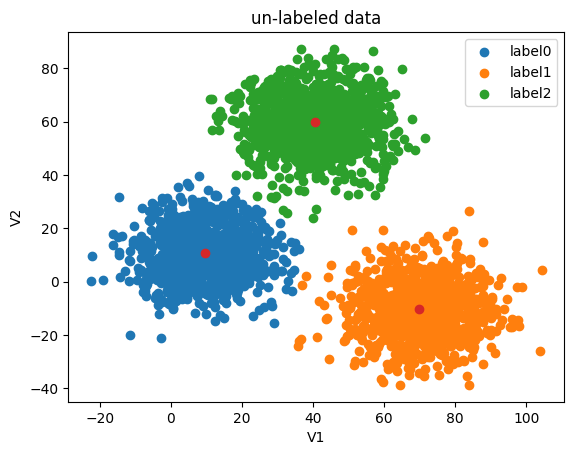

In [10]:
print(X.shape, y.shape)

from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(X)

centers = KM.cluster_centers_
print(centers)

fig3 = plt.figure()
label0 = plt.scatter(X.loc[:, "V1"][y==0], X.loc[:, "V2"][y==0])
label1 = plt.scatter(X.loc[:, "V1"][y==1], X.loc[:, "V2"][y==1])
label2 = plt.scatter(X.loc[:, "V1"][y==2], X.loc[:, "V2"][y==2])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(
    centers[:, 0],
    centers[:, 1]
)
plt.show()

In [12]:
# test data: V1=80, V2=60
y_pred_test = KM.predict([[80, 60]])
print(y_pred_test)


[0]


/Users/jiaronghe/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0    1149
1     952
2     899
Name: count, dtype: int64
labels
2    1156
1     954
0     890
Name: count, dtype: int64
0.31966666666666665


/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_87506/3029687736.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_pred))
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_87506/3029687736.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y))


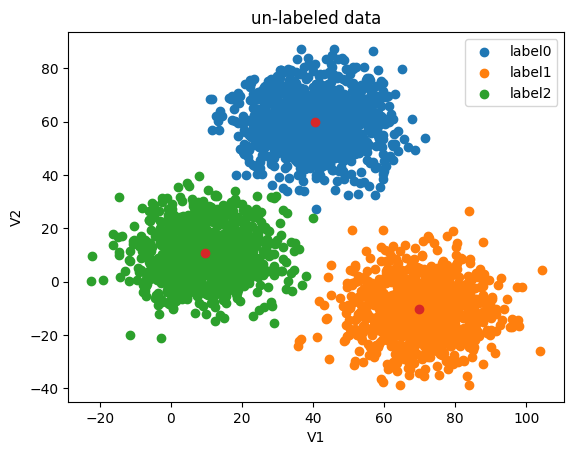

In [16]:
y_pred = KM.predict(X)
print(pd.value_counts(y_pred))
print(pd.value_counts(y))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(accuracy)

fig4 = plt.figure()
label0 = plt.scatter(X.loc[:, "V1"][y_pred==0], X.loc[:, "V2"][y_pred==0])
label1 = plt.scatter(X.loc[:, "V1"][y_pred==1], X.loc[:, "V2"][y_pred==1])
label2 = plt.scatter(X.loc[:, "V1"][y_pred==2], X.loc[:, "V2"][y_pred==2])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(
    centers[:, 0],
    centers[:, 1]
)
plt.show()

In [18]:
# 重新排列

y_corrected = []
for i in y_pred:
    if i == 0:
        y_corrected.append(2)
    if i == 1:
        y_corrected.append(1)
    if i == 2:
        y_corrected.append(0)

print(pd.value_counts(y_corrected))

print(accuracy_score(y, y_corrected))

2    1149
1     952
0     899
Name: count, dtype: int64
0.997


/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_87506/1561604086.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_corrected))
/private/tmp/PKInstallSandbox.6hRVfG/tmp/ipykernel_87506/1561604086.py:12: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  print(pd.value_counts(y_corrected))


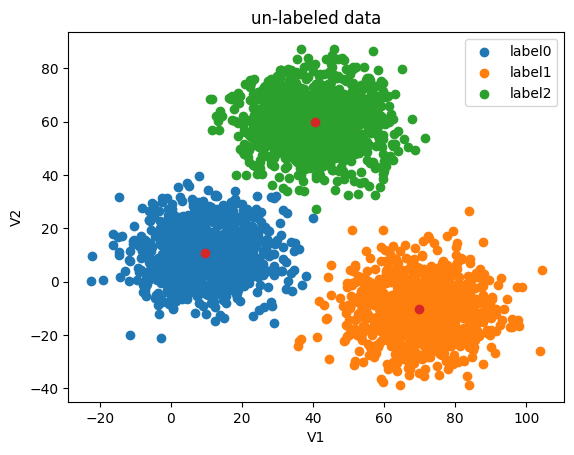

In [20]:
y_corrected = np.array(y_corrected)

fig6 = plt.figure()
label0 = plt.scatter(X.loc[:, "V1"][y_corrected==0], X.loc[:, "V2"][y_corrected==0])
label1 = plt.scatter(X.loc[:, "V1"][y_corrected==1], X.loc[:, "V2"][y_corrected==1])
label2 = plt.scatter(X.loc[:, "V1"][y_corrected==2], X.loc[:, "V2"][y_corrected==2])
plt.title("un-labeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
plt.scatter(
    centers[:, 0],
    centers[:, 1]
)
plt.show()